In [1]:
# PyPept modules
from pyPept.sequence import Sequence
from pyPept.sequence import correct_pdb_atoms
from pyPept.molecule import Molecule
from pyPept.converter import Converter
from pyPept.conformer import Conformer
from pyPept.conformer import SecStructPredictor

# RDKit modules
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
helm = "PEPTIDE1{[ac].S.C.H.L.P.W.A.S.G.L.E.T.L.D.S.[am]}$$$$V2.0"
b = Converter(helm=helm)
biln = b.get_biln()
seq = Sequence(biln)
# Correct atom names in the sequence object
seq = correct_pdb_atoms(seq)

# Loop wit the included monomers
mm_list = seq.s_monomers
for i, monomer in enumerate(mm_list):
    mon = monomer['m_romol']

In [10]:
# Generate the RDKit object
mol = Molecule(seq)
romol = mol.get_molecule(fmt='ROMol')
print("The SMILES of the peptide is: {}".format(Chem.MolToSmiles(romol)))
Draw.MolToFile(romol, 'peptide.png', size=(1200, 1200))

The SMILES of the peptide is: CC(=O)N[C@@H](CO)C(=O)N[C@@H](CS)C(=O)N[C@@H](Cc1c[nH]cn1)C(=O)N[C@@H](CC(C)C)C(=O)N1CCC[C@H]1C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](C)C(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@H](C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CO)C(N)=O)[C@@H](C)O


Predicted Secondary Structure: --------------- for main chain: SCHLPWASGLETLDS


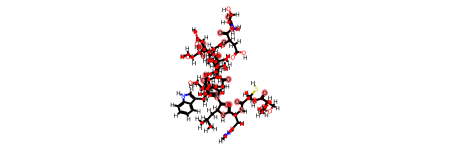

In [5]:
# Create the peptide conformer with corrected atom names and secondary structure
# Obtain peptide main chain to predict the secondary structure
fasta = Conformer.get_peptide(biln)
secstruct = SecStructPredictor.predict_active_ss(fasta)
# Generate the conformer
romol = Conformer.generate_conformer(romol, secstruct, generate_pdb=True)
romol